In [1]:
%pylab inline
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import scipy

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
import cv2

In [3]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [4]:
df = pd.read_json('/Users/Home/Desktop/CMPT 459/projectDataset/train.json')

In [5]:
print(df.shape)

(49352, 15)


In [6]:
df.tail()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium
124009,1.0,3,d89f514c3ed0abaae52cba7017ac0701,2016-04-20 05:34:00,***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...,E 54th St,"[Dining Room, Elevator, Laundry in Building, D...",40.7594,6901023,-73.9712,e90f2ded843cdb2efd65ef47d9fc8029,[https://photos.renthop.com/2/6901023_02052d90...,4280,123 E 54th St,high


In [7]:
df['created'] = df['created'].map(pd.to_datetime)

In [8]:
def get_hour(dt):
    return dt.hour
# creating a new hour column
df['hour'] = df['created'].map(get_hour)

In [9]:
df.shape

(49352, 16)

In [10]:
lower_bound = 0.005
upper_bound = 0.995

# Removing price outliers from dataframe

In [11]:
res = df.price.quantile([lower_bound, upper_bound])
true_index = (res.loc[lower_bound] < df.price.values) & (df.price.values < res.loc[upper_bound])
df.price[true_index].shape
# true_index
# new_df = df

(48839,)

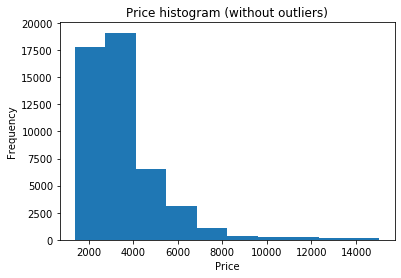

In [12]:
plt.hist(df.price[true_index])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price histogram (without outliers)")
plt.show()

In [13]:
df.loc[df.price == df.price[true_index].max()]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour
92641,2.5,3,63025b68e739a0ed3b969c9d7f0fbffb,2016-04-28 02:27:39,CooperCooper.com :: Listing ID #12_0722; Acces...,West 77th Street,"[Doorman, Fitness Center, Elevator, Balcony, L...",40.7824,6935564,-73.9805,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6935564_0c783013...,15046,227 West 77th Street,low,2


In [14]:
new_df = df.loc[true_index]
new_df.shape

(48839, 16)

In [15]:
missing_index = (new_df.longitude == 0)
missing_index = ~missing_index
# missing_index.value_counts()
new_df = new_df.loc[missing_index]
new_df.shape

(48828, 16)

# calculating distance from downtown to each listing latitude/longitude

In [16]:
from sklearn.metrics.pairwise import manhattan_distances

In [33]:
downtown = [40.7209, -74.0007]

def man_distances(row):
    
    dist = manhattan_distances([[row.latitude, row.longitude]], [downtown])
    np.asarray(dist)
    dist.flatten()
    return float(dist[0])


# new_df['dt_distance'] = new_df.apply(lambda row: man_distances(row), axis=1)

In [34]:
new_df.tail()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour,dt_distance
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low,3,0.1835
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium,2,0.1418
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium,5,0.1897
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium,2,0.0249
124009,1.0,3,d89f514c3ed0abaae52cba7017ac0701,2016-04-20 05:34:00,***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...,E 54th St,"[Dining Room, Elevator, Laundry in Building, D...",40.7594,6901023,-73.9712,e90f2ded843cdb2efd65ef47d9fc8029,[https://photos.renthop.com/2/6901023_02052d90...,4280,123 E 54th St,high,5,0.0680


In [36]:
new_df.dt_distance.min()

0.0014999999999929514

In [38]:
# df.loc[df.price == df.price[true_index].max()]

new_df.loc[new_df.dt_distance >= 0.9]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour,dt_distance
872,1.0,2,de47025fe5e6d20a1360cb3efe8c8348,2016-06-11 06:44:25,"Spacious two bedroom, corner unit with...",32 Garrison Street,"[Elevator, Cats Allowed, Dogs Allowed]",42.3459,7143730,-71.0794,c090563865adf7dd1c953e9d6bd65318,[https://photos.renthop.com/2/7143730_775991d2...,4186,32 Garrison Street,low,6,4.5463
4719,2.0,2,51052daba3eae7ee4e27bf436f7eb5a9,2016-06-27 02:48:10,Super Spacious Renovated 2BR/2BATH with Home O...,84 Street,"[Private Outdoor Space, Dishwasher, Hardwood F...",42.8724,7221153,-73.4662,5856ea690d343df5f3bc66315babb280,[https://photos.renthop.com/2/7221153_0160c1e4...,2300,1844 84 Street,low,2,2.6860
18267,1.0,2,0,2016-06-29 02:30:45,"Huge bedrooms, windows in every room! Hard woo...",1st Ave. Loop,"[Elevator, Laundry in Building, Dishwasher, Ha...",43.0346,7229074,-76.6336,f44a6215f74f901ac7e326207f2984f7,[https://photos.renthop.com/2/7229074_14de73ea...,3300,250 1st Ave. Loop,low,2,4.9466
24747,1.0,1,253df0eb4ce61b5bcb695a440606c58d,2016-06-12 03:46:05,Stunning one bedroom apartment with dr...,56 St. Botolph Street,"[Elevator, Cats Allowed, Dogs Allowed]",42.3459,7146153,-71.0794,6a393c2a7ce242d016fb0170ed19aa61,[https://photos.renthop.com/2/7146153_6c1b933d...,4123,56 St. Botolph Street,low,3,4.5463
39046,1.0,1,2adec6e74a834940cde0f05a8684d08f,2016-06-16 04:28:15,Lenox Farms Apartments & Town Homes of...,550 Liberty Street,"[Fitness Center, Cats Allowed, Dogs Allowed]",42.2019,7169135,-70.9846,50ef6c51bfe99f33e459ab902190e87f,[https://photos.renthop.com/2/7169135_9a47ffdd...,2140,550 Liberty Street,low,4,4.4971
39798,1.0,1,117aceb94c48bfd1f3066a22f999705f,2016-06-17 02:10:25,NO FEE 1 bedroom - Great Elevator - Laundry B...,"E 38th St,","[Elevator, Walk in Closet(s), High Ceilings, H...",34.0126,7174857,-118.2710,f19288238987b18a693e16ee23720c20,[https://photos.renthop.com/2/7174857_6d71b6e1...,2425,"234 E 38th St,",low,2,50.9786
41022,2.0,2,2adec6e74a834940cde0f05a8684d08f,2016-06-24 05:28:35,Lenox Farms Apartments & Town Homes of...,550 Liberty Street,"[Fitness Center, Cats Allowed, Dogs Allowed]",42.2019,7209113,-70.9846,43389561311270c553bb83a168a07a6b,[https://photos.renthop.com/2/7209113_f37eb785...,2709,550 Liberty Street,low,5,4.4971
57131,1.0,1,2adec6e74a834940cde0f05a8684d08f,2016-05-28 03:50:27,Lenox Farms Apartments & Town Homes of...,550 Liberty Street,"[Fitness Center, Cats Allowed, Dogs Allowed]",42.2019,7079426,-70.9846,43389561311270c553bb83a168a07a6b,[https://photos.renthop.com/2/7079426_dc48b760...,2308,550 Liberty Street,low,3,4.4971
62409,1.0,1,3dd500218fd52811b282f5af28a0961f,2016-05-06 04:27:33,Vacant,300 2nd Avenue,"[Elevator, Fitness Center, Cats Allowed, Dogs ...",42.3033,6974621,-71.2133,602fee16546f42bfa81f4adc05261cfa,[https://photos.renthop.com/2/6974621_11136b2c...,2889,300 2nd Avenue,low,4,4.3698
72896,1.0,0,2fc165040867a7c3694de4b4a63b1062,2016-05-07 10:34:35,Bright UES studio apartment! Only two flights ...,E 78th St between First and York,[],41.7530,6981117,-87.6134,ee89e559c627af61e8730ea4ad7011d6,[https://photos.renthop.com/2/6981117_2428e796...,2000,452 E 78th St #2A (First Ave & York Ave),low,10,14.6448


# removing latitude/longitude outliers 

In [39]:
res = new_df.longitude.quantile([lower_bound, upper_bound])
true_index = (res.loc[lower_bound] < new_df.longitude.values) & (new_df.longitude.values < res.loc[upper_bound])
true_index
new_df.longitude[true_index].describe()

count    48329.000000
mean       -73.973306
std          0.026293
min        -74.017900
25%        -73.991700
50%        -73.978000
75%        -73.955200
max        -73.832500
Name: longitude, dtype: float64

In [40]:
new_df = new_df.loc[true_index]
new_df.shape

(48329, 17)

In [54]:
subway_df = pd.read_csv('/Users/Home/Desktop/CMPT 459/MI2/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
subway_df.head(1)

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.99822,"(40.660397, -73.998091)","(40.660489, -73.99822)"


In [50]:
subway_entrance_lat = subway_df['Entrance Latitude']
subway_entrance_lat.describe()

count    1868.000000
mean       40.734063
std         0.070382
min        40.575499
25%        40.689808
50%        40.733535
75%        40.767655
max        40.903597
Name: Entrance Latitude, dtype: float64

In [51]:
subway_entrance_long = subway_df['Entrance Longitude']
subway_entrance_long.describe()

count    1868.000000
mean      -73.864370
std         3.423331
min       -74.031383
25%       -73.987482
50%       -73.958385
75%       -73.911159
max        73.993327
Name: Entrance Longitude, dtype: float64

# Calculating the minimum distance from each listing to subway entrance

In [55]:
#### don't run this cell again; takes 7 hours to run
# def min_man_distances(row):
    min_dist = float('inf')
    for entry in range(len(subway_entrance_long)):
        dist = manhattan_distances([[subway_entrance_lat[entry], subway_entrance_long[entry]]], [[row.latitude, row.longitude]])
        min_dist = min(min_dist, dist)
    np.asarray(min_dist)
    min_dist.flatten()
    return float(min_dist[0])


# new_df['subway_distance'] = new_df.apply(lambda row: min_man_distances(row), axis=1)

In [76]:
x = new_df.subway_distance.max()
new_df.loc[new_df.subway_distance >= x]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,hour,dt_distance,subway_distance
18023,1.0,3,5f48394f3cf52d675ac9edafd75bb169,2016-06-28 02:51:55,"This 3 bedroom has nice size eat in kitchen, l...",Lawrence Ave.,[],41.0868,7224018,-73.8602,db976724c28c1e157701fcf13d68823f,[https://photos.renthop.com/2/7224018_2c3c3253...,1975,49 Lawrence Ave.,high,2,0.5064,0.193043
71920,1.0,2,5f48394f3cf52d675ac9edafd75bb169,2016-05-02 02:51:21,This fully renovated 2 bedroom apartment has a...,Lawrence Ave.,"[Fireplace, Dining Room, Laundry in Unit, Dish...",41.0868,6952951,-73.8602,db976724c28c1e157701fcf13d68823f,[https://photos.renthop.com/2/6952951_34c98d93...,2000,49 Lawrence Ave.,high,2,0.5064,0.193043


In [5]:
# new_df.to_json('/Users/Home/Desktop/CMPT 459/MI2/train_fe.json')
new_df = pd.read_json('/Users/Home/Desktop/CMPT 459/MI2/train_fe.json')

In [7]:
new_df.describe()

,bathrooms,bedrooms,created,latitude,listing_id,longitude,price,hour,dt_distance,subway_distance
count,48329.000000,48329.000000,4.832900e+04,48329.000000,4.832900e+04,48329.000000,48329.000000,48329.000000,48329.000000,48329.000000
mean,1.202580,1.537814,1.463378e+12,40.751314,7.024177e+06,-73.973306,3591.716857,4.747874,0.068668,0.004221
std,0.471324,1.108435,2.234931e+09,0.038397,1.261946e+05,0.026293,1756.051283,4.176035,0.045785,0.003326
min,0.000000,0.000000,1.459549e+12,40.571200,6.811957e+06,-74.017900,1395.000000,0.000000,0.001500,0.000025
25%,1.000000,1.000000,1.461378e+12,40.728700,6.916256e+06,-73.991700,2500.000000,2.000000,0.029600,0.001882
50%,1.000000,1.000000,1.463369e+12,40.752000,7.021180e+06,-73.978000,3163.000000,3.000000,0.058800,0.003541
75%,1.000000,2.000000,1.465365e+12,40.774200,7.128526e+06,-73.955200,4100.000000,5.000000,0.101100,0.005736
max,10.000000,8.000000,1.467237e+12,41.086800,7.753784e+06,-73.832500,15046.000000,23.000000,0.506400,0.193043


In [12]:
df["num_photos"] = df["photos"].apply(len)
df["num_features"] = df["features"].apply(len)
df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["created"] = pd.to_datetime(df["created"])
df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day

In [15]:
df.shape

(49352, 21)

In [17]:
num_feats = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words",
             "created_year", "created_month", "created_day"]
X = df[num_feats]
y = df["interest_level"]
X.head()
y.head()

4     medium
6        low
9     medium
10    medium
15       low
Name: interest_level, dtype: object

# Train model

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

In [27]:
# clf = RandomForestClassifier(n_estimators=1000)
clf = SVC(gamma='auto', probability=True)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.7815262583900936

In [28]:
df = pd.read_json(open("/Users/Home/Desktop/CMPT 459/projectDataset/test.json"))
print(df.shape)
df["num_photos"] = df["photos"].apply(len)
df["num_features"] = df["features"].apply(len)
df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["created"] = pd.to_datetime(df["created"])
df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day
X = df[num_feats]

y = clf.predict_proba(X)

(74659, 14)


In [21]:
labels2idx = {label: i for i, label in enumerate(clf.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [23]:
sub = pd.DataFrame()
sub["listing_id"] = df["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)